# Week 8 K-Nearest Neighbors Classifier and Model Selection

### Import necessary modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Study model complexity w.r.t. K

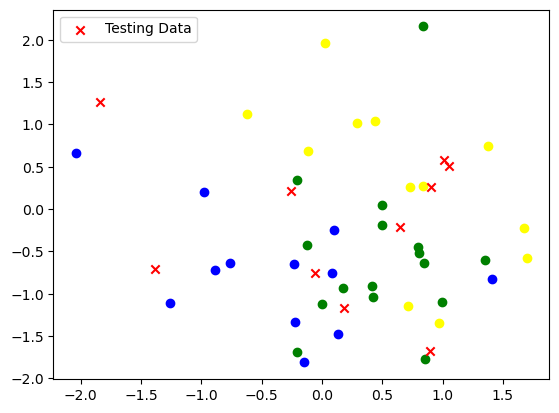

In [6]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=None)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [10]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.5


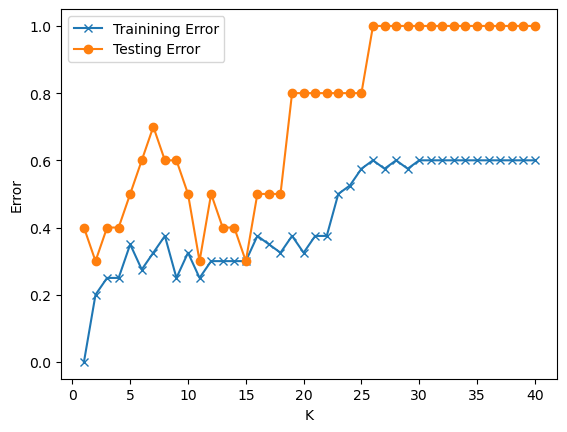

In [12]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

### k-fold cross validation

In [15]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.6 0.6 0.6 0.4 0.4 1.  1.  0.6 0.6 0.8]
Average accuracy: 0.6600 +- 0.2010


### Automatic model hyperparameter (algorithm parameter) tuning

In [63]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  13
The accuracy:  0.76
